In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import cohen_kappa_score
from itertools import product
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import confusion_matrix

In [2]:
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

In [3]:
data = pd.read_csv("./data/items_categories.csv")
data = data.set_index('catégories')
print(data.shape)
data.head()

(4, 1084)


,563,81,79,80,849,851,852,850,87,89,...,977,524,997,1063,251,4,710,1002,943,1001
catégories,,,,,,,,,,,,,,,,,,,,,
CH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CS,1821,334,244,247,431,413,327,471,447,376,...,14,10,8,30,8,4,14,12,15,13
IH,197,60,22,24,30,45,36,51,51,63,...,0,0,3,0,0,0,11,2,0,2
IS,384,78,73,61,91,73,84,101,146,156,...,5,0,4,2,2,0,4,3,1,2


In [91]:
confusion_matrix(data.iloc[:,0], data.iloc[:,5])

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [83]:
cohen_kappa_score(data.iloc[:,0], data.iloc[:,1])

0.19999999999999996

# Statistiques of items_categories matrix

In [3]:
from pandas.plotting import parallel_coordinates

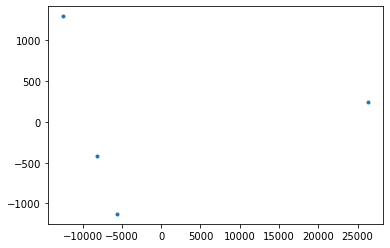

In [5]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
xx = pca.transform(data)
plt.plot(xx[:,0],xx[:,1],'.')

# Create similarity matrice

In [3]:
# Create une matrice item to item en format dataframe
def createEmpty_item_to_item_asDf(data,export=False):
    """
    ==> Exemple
    items_similarity = createEmpty_item_to_item_asDf(data)
    empty_ii_df
    """
    column_names = data.columns
    columns = pd.DataFrame(columns = column_names)
    index = pd.DataFrame(column_names, columns = ['item_id'])
    empty_ii_df = pd.concat([index,columns], axis=1)
    empty_ii_df = empty_ii_df.set_index("item_id")
    if export:
        print("exporting empty items to items matrice as dataframe")
        empty_ii_df.to_csv("items_to_items_emptyMatrix.csv")
    return empty_ii_df

# Calculate items to items similarity using the coefficient of Pearson or Kappa ==> METHOD 1
def item_to_item_similarity1(data,emptyDataframe,coeff="kappa"):
    """
    items_similarity = item_to_item_similarity1(data,empty_ii_df,coeff="kappa")
    items_similarity.head()
    """
    if coeff == "kappa":
        print("Start calculating item to item similarity using cohen kappa")
        items_similarity = emptyDataframe
        index = data.columns
        for i in tqdm(index):
            for j in index:
                val = cohen_kappa_score(data[i],data[j])
                items_similarity.loc[i,j] = val
        return items_similarity
    elif coeff == "pearson":
        print("Start calculating item to item similarity using coefficient of Pearson")
        items_similarity = data.corr()
        return items_similarity

def item_to_item_similarity1(data):

    column_names = data.columns
    columns = pd.DataFrame(columns = column_names)
    items = pd.DataFrame(column_names, columns = ['item_id'])
    items_similarity = pd.concat([items,columns], axis=1)
    items_similarity = items_similarity.set_index("item_id")

    index = data.columns
    for i in tqdm(index):
        for j in index:
            val = cohen_kappa_score(data[i],data[j])
            items_similarity.loc[i,j] = val
    return items_similarity
    

# Clustering using cohen kappa similarity matrice

In [4]:
clustering_data = data.iloc[:,:]
clustering_data.head()

,563,81,79,80,849,851,852,850,87,89,...,977,524,997,1063,251,4,710,1002,943,1001
catégories,,,,,,,,,,,,,,,,,,,,,
CH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CS,1821,334,244,247,431,413,327,471,447,376,...,14,10,8,30,8,4,14,12,15,13
IH,197,60,22,24,30,45,36,51,51,63,...,0,0,3,0,0,0,11,2,0,2
IS,384,78,73,61,91,73,84,101,146,156,...,5,0,4,2,2,0,4,3,1,2


In [5]:
empty_ii_df = createEmpty_item_to_item_asDf(clustering_data)
empty_ii_df

,563,81,79,80,849,851,852,850,87,89,...,977,524,997,1063,251,4,710,1002,943,1001
item_id,,,,,,,,,,,,,,,,,,,,,
563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
items_similarity = item_to_item_similarity1(clustering_data,empty_ii_df,coeff="kappa")
items_similarity.head()

100%|██████████| 1084/1084 [11:36<00:00,  1.56it/s]


,563,81,79,80,849,851,852,850,87,89,...,977,524,997,1063,251,4,710,1002,943,1001
item_id,,,,,,,,,,,,,,,,,,,,,
563,1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.142857,0.0769231,0.2,0.142857,0.142857,0.0769231,0.2,0.2,0.142857,0.2
81,0.2,1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.142857,0.0769231,0.2,0.142857,0.142857,0.0769231,0.2,0.2,0.142857,0.2
79,0.2,0.2,1,0.2,0.2,0.428571,0.2,0.2,0.2,0.2,...,0.142857,0.0769231,0.2,0.142857,0.142857,0.0769231,0.2,0.2,0.142857,0.2
80,0.2,0.2,0.2,1,0.2,0.2,0.2,0.2,0.2,0.2,...,0.142857,0.0769231,0.2,0.142857,0.142857,0.0769231,0.2,0.2,0.142857,0.2
849,0.2,0.2,0.2,0.2,1,0.2,0.2,0.2,0.2,0.2,...,0.142857,0.0769231,0.2,0.0769231,0.142857,0.0769231,0.2,0.2,0.142857,0.2


In [24]:
items_similarity.to_csv("./data/items_similarity.csv")

# Hard and Soft Clustering

In [6]:
#Load Items Similarity

In [5]:
items_similarity = pd.read_csv("./data/items_similarity.csv")
items_similarity = items_similarity.set_index('item_id')
print(items_similarity.shape)
items_similarity

(1084, 1084)


,563,81,79,80,849,851,852,850,87,89,...,977,524,997,1063,251,4,710,1002,943,1001
item_id,,,,,,,,,,,,,,,,,,,,,
563,1.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.142857,0.076923,0.200000,0.142857,0.142857,0.076923,0.200000,0.200000,0.142857,0.200000
81,0.200000,1.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.142857,0.076923,0.200000,0.142857,0.142857,0.076923,0.200000,0.200000,0.142857,0.200000
79,0.200000,0.200000,1.000000,0.200000,0.200000,0.428571,0.200000,0.200000,0.200000,0.200000,...,0.142857,0.076923,0.200000,0.142857,0.142857,0.076923,0.200000,0.200000,0.142857,0.200000
80,0.200000,0.200000,0.200000,1.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.142857,0.076923,0.200000,0.142857,0.142857,0.076923,0.200000,0.200000,0.142857,0.200000
849,0.200000,0.200000,0.200000,0.200000,1.000000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.142857,0.076923,0.200000,0.076923,0.142857,0.076923,0.200000,0.200000,0.142857,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,...,0.200000,0.428571,0.000000,0.200000,0.200000,1.000000,0.000000,0.076923,0.200000,0.076923
710,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.384615,0.076923,0.428571,0.142857,0.142857,0.000000,1.000000,0.200000,0.142857,0.200000
1002,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.142857,0.076923,0.142857,0.076923,0.076923,0.076923,0.200000,1.000000,0.142857,0.384615


## PCA

In [6]:
plt.style.use('seaborn-talk')

([<matplotlib.axis.XTick at 0x17edf36a790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

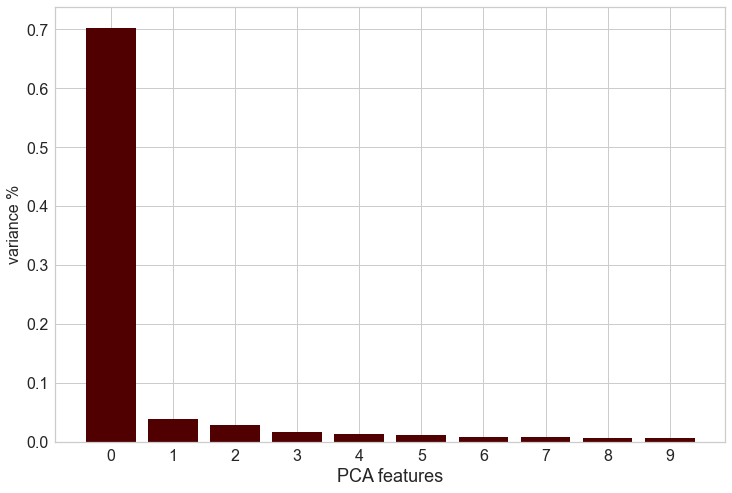

In [57]:
from sklearn.preprocessing import StandardScaler
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(items_similarity)
# Create a PCA instance: pca
pca = decomposition.PCA(n_components=10)
principalComponents = pca.fit_transform(items_similarity)
# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.bar(features, pca.explained_variance_ratio_, color='#500000')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
#PCA_components = pd.DataFrame(principalComponents)

392


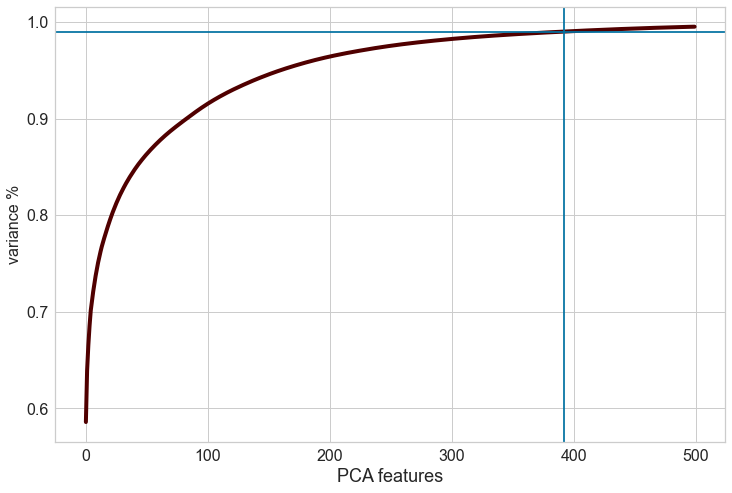

In [64]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(items_similarity)
# Create a PCA instance: pca
pca = decomposition.PCA(n_components=500)
principalComponents = pca.fit_transform(X_std)
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('PCA features', fontsize=18)
plt.ylabel('variance %', fontsize=16)
print(np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=4, color='#500000')
plt.axvline(x=392, c='b')
plt.axhline(y=0.99, color='b')

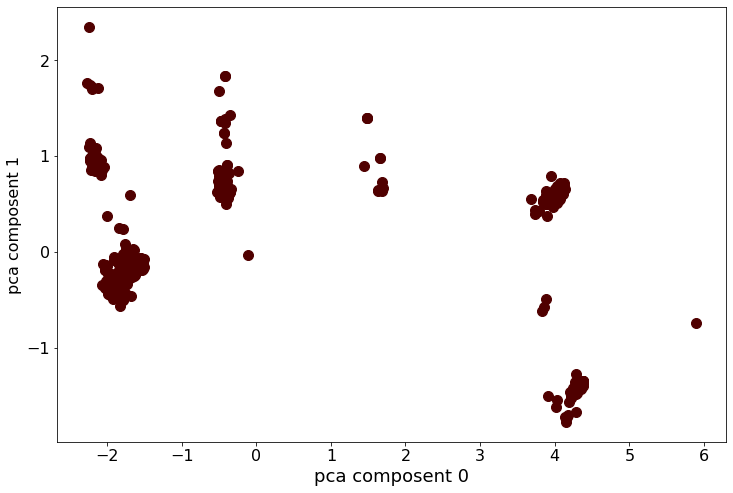

In [6]:
X_std = StandardScaler().fit_transform(items_similarity)
pca = decomposition.PCA(n_components=392)
features = pca.fit_transform(items_similarity)
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('pca composent 0', fontsize=18)
plt.ylabel('pca composent 1', fontsize=16)
plt.plot(features[:,0],features[:,1],'.',color='#500000',markersize=20)

## K-means Clustering

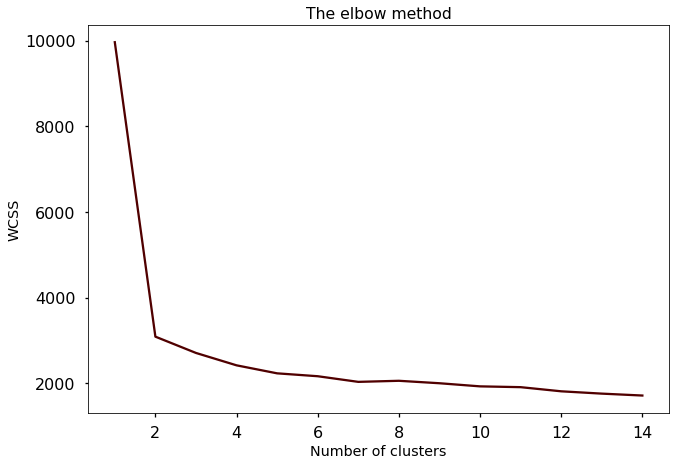

In [10]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, 15), wcss,color="#500000")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

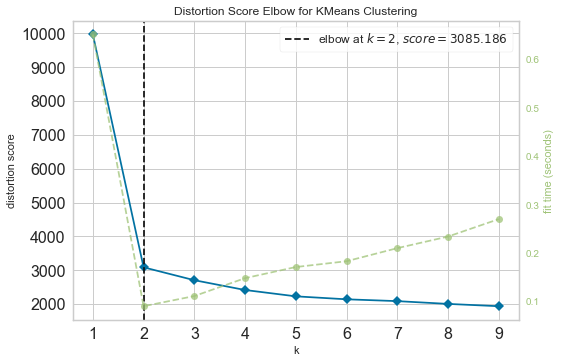

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show(s=200,color="#500000")        # Finalize and render the figure

In [8]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 10000, n_init = 50, random_state = 0)
y_kmeans_1_ = kmeans.fit_predict(features)

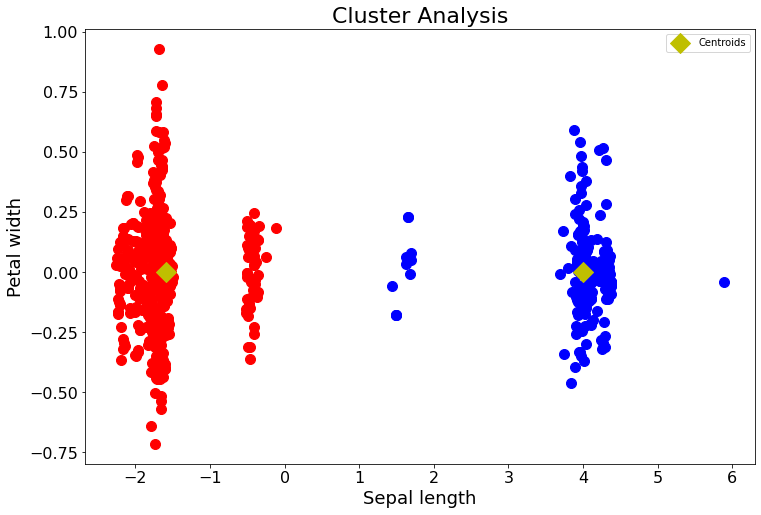

In [61]:
#Visualising the clusters
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.scatter(features[y_kmeans_1_ == 0,0], features[y_kmeans_1_ == 0,18],s = 100, c = 'red')
plt.scatter(features[y_kmeans_1_ == 1,0], features[y_kmeans_1_ == 1,18],s = 100, c = 'blue')
# plt.scatter(features[y_kmeans_1_ == 2,10], features[y_kmeans_1_ == 2,1],s = 100,  c = 'green')
# plt.scatter(features[y_kmeans_1_ == 3,10], features[y_kmeans_1_ == 3,1],s = 100,  c = 'orange')
# plt.scatter(features[y_kmeans_1_ == 4,10], features[y_kmeans_1_ == 4,1],s = 100,  c = 'ForestGreen')




#Plotting the centroids of the clusters  #500000
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,18], s = 200, c = 'y', label = 'Centroids',marker='D')
#plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 200, c = 'y', label = 'Centroids',marker='D')


plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Petal width', fontsize=18)
plt.title("Cluster Analysis", fontsize=22)
plt.legend()

In [62]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter = 300, n_init = 2, random_state = 0)
y_kmeans_2_ = kmeans.fit_predict(features)

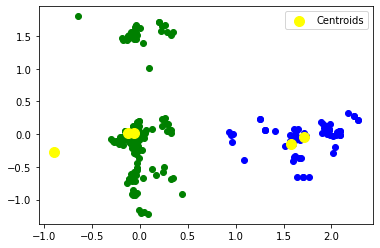

In [63]:
#Visualising the clusters
plt.scatter(features[y_kmeans_2_ == 0,2], features[y_kmeans_2_ == 0,3], c = 'red')
plt.scatter(features[y_kmeans_2_ == 1,2], features[y_kmeans_2_ == 1,3], c = 'blue')
plt.scatter(features[y_kmeans_2_ == 2,2], features[y_kmeans_2_ == 2,3],  c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [64]:
# Comparaison of models
print(f'With init:kmeans++ ==> Silhouette Score(n=3): {silhouette_score(features, y_kmeans_1_)}')
print(f'With init:kmeans++ ==> Silhouette Score(n=3): {silhouette_score(features, y_kmeans_2_)}')

# ==> Enfin, la partition avec le SI le plus élevé est considérée comme optimale

With init:kmeans++ ==> Silhouette Score(n=3): 0.6209053206414707
With init:kmeans++ ==> Silhouette Score(n=3): 0.29021731033130327


## Fuzzy Clustering

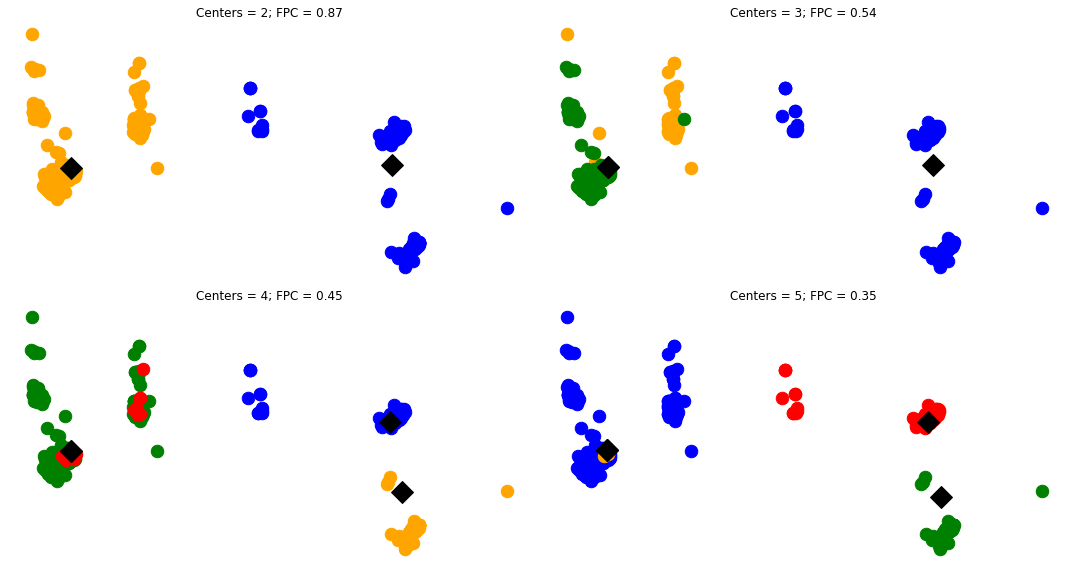

In [95]:
X = features

fig1, axes1 = plt.subplots(2, 2, figsize=(15, 8))
fpcs = []

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 
xpts = np.hstack(X[:,0])
ypts = np.hstack(X[:,1])
#alldata = np.vstack((xpts, ypts))
alldata = features.T

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later plots
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set

    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.',markersize=25, color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], marker='D', color="black",markersize=15,label = 'Centroids')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
fig1.savefig('iris_dataset.png')

#### Le FPC est défini sur la plage de 0 à 1, 1 étant le meilleur. C'est une métrique qui nous dit avec quelle précision nos données sont décrites par un certain modèle. Ensuite, nous allons regrouper notre ensemble de données - dont nous savons qu'il a trois clusters - plusieurs fois, avec entre 2 et 9 clusters. Nous montrerons ensuite les résultats du clustering et tracerons le coefficient de partition floue. Lorsque le FPC est maximisé, nos données sont mieux décrites.

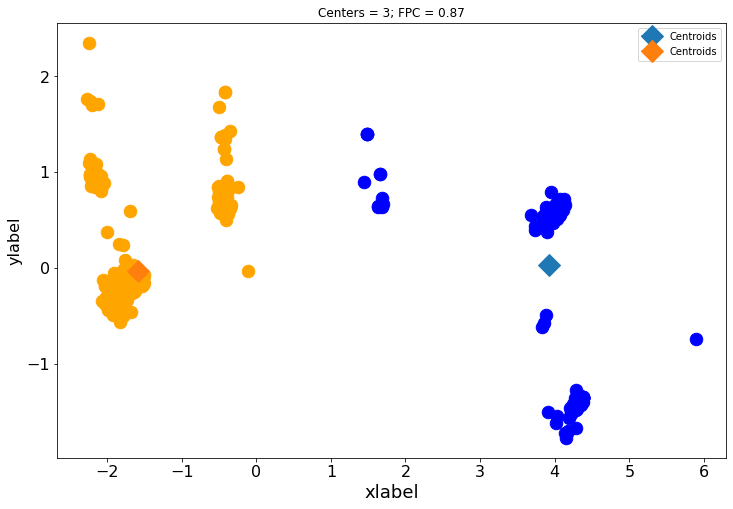

In [94]:
X = features
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 
xpts = np.hstack(X[:,0])
ypts = np.hstack(X[:,1])

alldata = features.T

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, 2, 2, error=0.005, maxiter=1000, init=None)

# Plot assigned clusters, for each data point in training set
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

cluster_membership = np.argmax(u, axis=0)

plt.plot(alldata[0,cluster_membership == 0],alldata[1,cluster_membership == 0], '.',markersize=25, color=colors[0])
plt.plot(alldata[0,cluster_membership == 1],alldata[1,cluster_membership == 1], '.',markersize=25, color=colors[1])


# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], marker='D',markersize=15,label = 'Centroids')

plt.title('Centers = {0}; FPC = {1:.2f}'.format(3, fpc))
plt.legend()

In [83]:
features.T.shape

(392, 1084)

In [9]:
#u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(alldata, cntr, 2, error=0.005, maxiter=1000, init=None)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(features.T, 2, 2, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
print(fpc)
# Comparaison of models
print(f'With init:kmeans++ ==> Silhouette Score(n=2): {silhouette_score(features,cluster_membership)}')

0.8655816692879394
With init:kmeans++ ==> Silhouette Score(n=2): 0.620903048943109


# Hierarchical Clustering

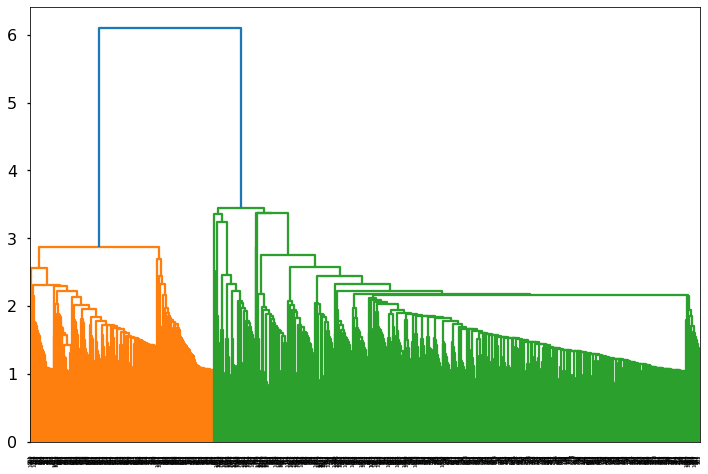

In [11]:
#plt.style.use('classic')
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=1)
plt.yticks(fontsize=16)
dendogram = sch.dendrogram(sch.linkage(features, method="average"))

In [15]:
# single
Z_s = sch.linkage(features, method="single",metric="euclidean")
c_s, coph_dists_s = cophenet(Z_s, pdist(features,metric="euclidean"))
# complete
Z_c = sch.linkage(features, method="complete",metric="euclidean")
c_c, coph_dists_c = cophenet(Z_c, pdist(features,metric="euclidean"))
# average
Z_a = sch.linkage(features, method="average",metric="euclidean")
c_a, coph_dists_a = cophenet(Z_a, pdist(features,metric="euclidean"))
# ward
Z_w = sch.linkage(features, method="ward",metric="euclidean")
c_w, coph_dists_w = cophenet(Z_w, pdist(features,metric="euclidean"))
# median
Z_m = sch.linkage(features, method="median",metric="euclidean")
c_m, coph_dists_m = cophenet(Z_m, pdist(features,metric="euclidean"))
# weighted
Z_we = sch.linkage(features, method="weighted",metric="euclidean")
c_we, coph_dists_we = cophenet(Z_we, pdist(features,metric="euclidean"))
# centroid
Z_ce = sch.linkage(features, method="centroid",metric="euclidean")
c_ce, coph_dists_ce = cophenet(Z_ce, pdist(features,metric="euclidean"))

In [16]:
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

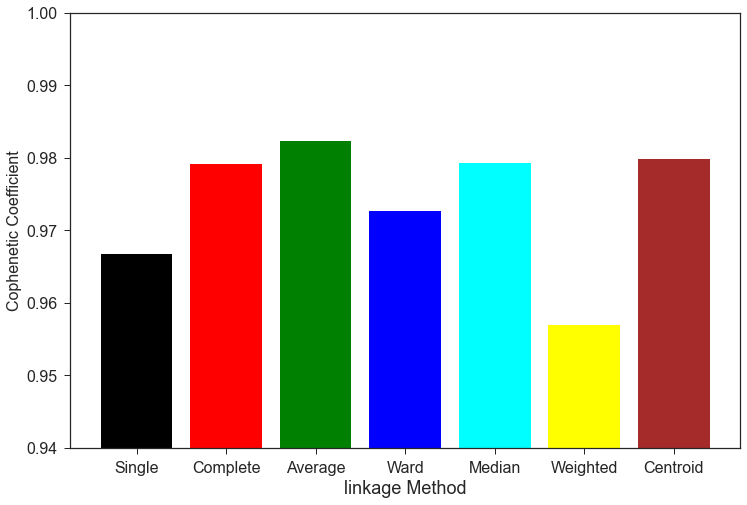

In [19]:
plt.style.use('seaborn-notebook')
# create a dataset
height = [c_s,c_c,c_a,c_w,c_m,c_we,c_ce]
bars = ('Single', 'Complete', 'Average', 'Ward','Median','Weighted','Centroid')
x_pos = np.arange(len(bars))
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('linkage Method', fontsize=18)
plt.ylabel('Cophenetic Coefficient', fontsize=16)
# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan','yellow','brown'])
plt.ylim([0.94, 1])
# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="average")
y_hc = hc.fit_predict(features)

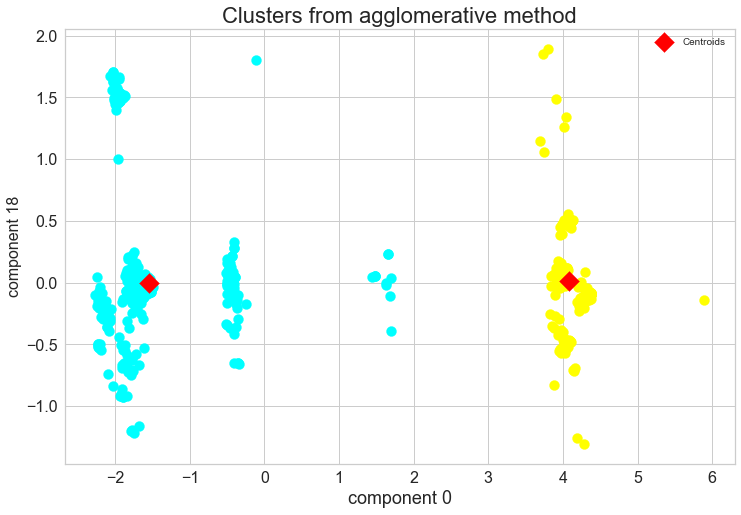

In [94]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('component 0', fontsize=18)
plt.ylabel('component 18', fontsize=16)

plt.scatter(features[y_hc == 0,0], features[y_hc == 0,3],s=100,c="cyan")
plt.scatter(features[y_hc == 1,0], features[y_hc == 1,3],s=100,c="yellow")
# plt.scatter(features[y_hc == 2,0], features[y_hc == 2,18],s=100,c="red")
# plt.scatter(features[y_hc == 3,0], features[y_hc == 3,18],s=100,c="blue")
plt.scatter(clf.centroids_[:, 0], clf.centroids_[:,3], s = 200, c = 'red', label = 'Centroids',marker='D')
plt.title("Clusters from agglomerative method", fontsize=22)
plt.legend()

# Clustering Validation

In [13]:
# from jqmcvi import base
from sklearn.metrics import davies_bouldin_score

In [14]:
print(davies_bouldin_score(features, y_kmeans_1_))
print(davies_bouldin_score(features, y_hc))
print(davies_bouldin_score(features, cluster_membership))


0.5862331924061998
0.576612482361918
0.5862331924061998


In [32]:
!pip install git+https://github.com/jqmviegas/jqm_cvi.git

  Cloning https://github.com/jqmviegas/jqm_cvi.git to c:\users\abdou\appdata\local\temp\pip-req-build-klg42d0t
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\abdou\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\abdou\\AppData\\Local\\Temp\\pip-req-build-klg42d0t\\setup.py'"'"'; __file__='"'"'C:\\Users\\abdou\\AppData\\Local\\Temp\\pip-req-build-klg42d0t\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\abdou\AppData\Local\Temp\pip-pip-egg-info-j9gcrev8'
         cwd: C:\Users\abdou\AppData\Local\Temp\pip-req-build-klg42d0t\
    Complete output (41 lines):
    Traceback (most recent call last):
      File "C:\Users\abdou\anaconda3\lib\site-packages\numpy\core\__init__.py", line 22, in <module>
        from . import multiarray
      File "C:\Users\abdou\anaconda3\l

In [11]:
# Comparaison of models
print(f'hierarchical clustering ==> Silhouette Score(n=2): {silhouette_score(features, y_hc)}')
print(f'kmeans clustering ==> Silhouette Score(n=2): {silhouette_score(features, y_kmeans_1_)}')
print(f'fuzzy clustering ==> Silhouette Score(n=2): {silhouette_score(features,cluster_membership)}')
# ==> Enfin, la partition avec le SI le plus élevé est considérée comme optimale

hierarchical clustering ==> Silhouette Score(n=2): 0.6203152002053539
kmeans clustering ==> Silhouette Score(n=2): 0.620903048943109
fuzzy clustering ==> Silhouette Score(n=2): 0.620903048943109


In [17]:
# We store the clusters
from jqmcvi import base
clus0 = features[y_kmeans_1_ == 0,:]
clus1 = features[y_kmeans_1_ == 1,:]
cluster_list = [clus0, clus1]
  
print(base.dunn(cluster_list))

0.42756758234500336
